**Column Explanations:**

- **type** $\Rightarrow$ 0: Existing Customers, 1: New Customer
- **age** $\Rightarrow$ 0: Young , 1: Old
- **sex** $\Rightarrow$ F: Female, M: Male
- **job** $\Rightarrow$ 1: White Collar, 0: Blue Collar
- **ms** $\Rightarrow$  1: Married, 0: Single
- **house** $\Rightarrow$ 1:Private housing , 0: Public Housing
- $P_a$,$P_b$,$P_c$,$P_d$ $\Rightarrow$ Indicator of product purchase 
- **spend** $\Rightarrow$ Amount spent

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("dbm.csv", index_col="id")
df

,type,age,sex,job,ms,house,Pa,Pb,Pc,Pd,spend
id,,,,,,,,,,,
1,0,1,F,1,1,1,0,1,0,1,9.32
2,0,1,M,1,1,1,0,0,1,1,11.88
3,0,1,F,1,1,1,0,0,0,1,4.06
4,0,1,F,1,1,1,0,1,0,1,9.61
5,1,1,F,1,1,1,0,0,0,1,3.99
...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,F,0,1,1,0,1,0,1,9.41
1997,1,0,M,0,1,0,0,0,0,0,0.09
1998,1,0,M,1,1,1,1,0,1,0,18.46


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["sex"] = encoder.fit_transform(df["sex"])
df

,type,age,sex,job,ms,house,Pa,Pb,Pc,Pd,spend
id,,,,,,,,,,,
1,0,1,0,1,1,1,0,1,0,1,9.32
2,0,1,1,1,1,1,0,0,1,1,11.88
3,0,1,0,1,1,1,0,0,0,1,4.06
4,0,1,0,1,1,1,0,1,0,1,9.61
5,1,1,0,1,1,1,0,0,0,1,3.99
...,...,...,...,...,...,...,...,...,...,...,...
1996,1,1,0,0,1,1,0,1,0,1,9.41
1997,1,0,1,0,1,0,0,0,0,0,0.09
1998,1,0,1,1,1,1,1,0,1,0,18.46


In [8]:
encoder.classes_

array(['F', 'M'], dtype=object)

In [9]:
df.describe()

,type,age,sex,job,ms,house,Pa,Pb,Pc,Pd,spend
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.498000,0.437000,0.526000,0.512500,0.436500,0.512500,0.643500,0.371000,0.272000,0.502500,12.950260
std,0.500121,0.496139,0.499448,0.499969,0.496075,0.499969,0.479085,0.483193,0.445101,0.500119,6.935077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.400000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,13.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.492500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.940000


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns = df.columns)
df_scaled

,type,age,sex,job,ms,house,Pa,Pb,Pc,Pd,spend
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.333333
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.424991
2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.145005
3,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.343716
4,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.142499
...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.336556
1996,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.002864
1997,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.660580
1998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.566774


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kList = np.arange(2,11)

distortionList =[]
silhouetteList = []

for k in kList:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    distortionList.append(kmeans.inertia_)
    silhouetteList.append(silhouette_score(df_scaled , kmeans.labels_))

In [15]:
kmeans.labels_

array([5, 8, 5, ..., 7, 4, 6])

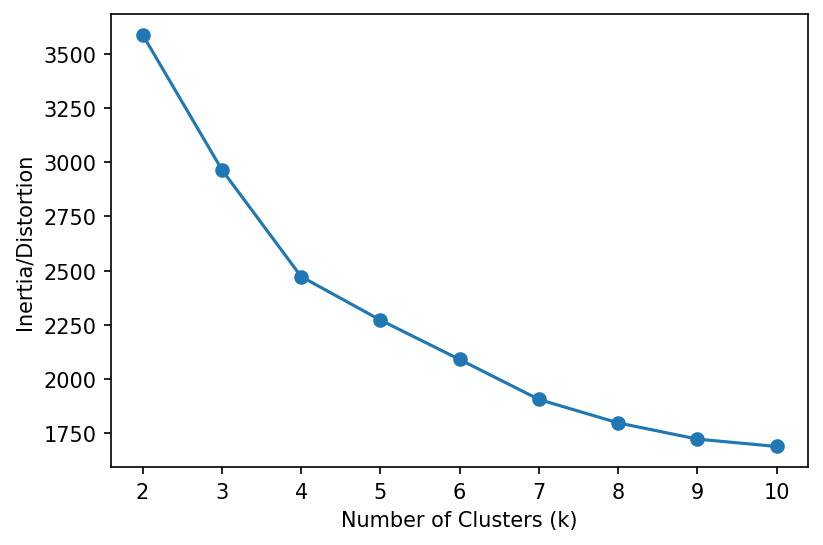

In [13]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.plot(kList , distortionList, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia/Distortion")
plt.show()

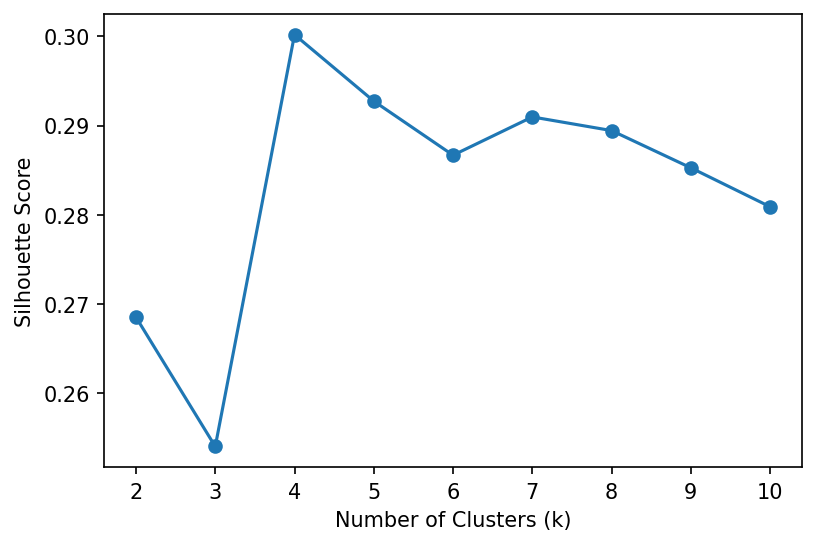

In [14]:
plt.figure(dpi=150)
plt.plot(kList , silhouetteList, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 4, n_init = 10)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [18]:
kmeans.cluster_centers_
results = pd.DataFrame(kmeans.cluster_centers_ , columns = df.columns)
results

,type,age,sex,job,ms,house,Pa,Pb,Pc,Pd,spend
0,0.503257,0.004886,0.514658,0.996743,0.009772,0.995114,1.000000,0.131922,0.384365,0.495114,0.578725
1,0.507495,0.995717,0.537473,0.010707,0.980728,0.008565,0.177730,0.629550,0.122056,0.539615,0.305166
2,0.452088,0.990172,0.530713,0.995086,0.997543,0.995086,0.191646,0.113022,0.351351,0.520885,0.272706
3,0.519531,0.005859,0.525391,0.005859,0.005859,0.009766,1.000000,0.626953,0.210937,0.462891,0.620663


**Column Explanations:**

- **type** $\Rightarrow$ 0: Existing Customers, 1: New Customer
- **age** $\Rightarrow$ 0: Young , 1: Old
- **sex** $\Rightarrow$ F: Female, M: Male
- **job** $\Rightarrow$ 1: White Collar, 0: Blue Collar
- **ms** $\Rightarrow$  1: Married, 0: Single
- **house** $\Rightarrow$ 1:Private housing , 0: Public Housing
- $P_a$,$P_b$,$P_c$,$P_d$ $\Rightarrow$ Indicator of product purchase 
- **spend** $\Rightarrow$ Amount spent